## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [53]:
df[['TV','Radio']]

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

In [26]:
#plt.scatter(Fill_this_in)

In [46]:
from pandas.tools.plotting import scatter_matrix 

Which of the variables seem correlated with one another? Which don't? Explain your answer

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np

a) Set y to be the sales in df

In [11]:
# Code here
y = df.Sales

b) Set X to be just the features described above in df

In [12]:
# Code here
X = df.drop(labels='Sales', axis=1)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [18]:
# Code here
Index = range(int(len(df)))
random.shuffle(Index)

X_train=[]
X_test=[]
y_train=[]
y_test=[]
for i in range(0,int(0.2*len(df))):
    X_test.append(X.iloc[Index[i]])
    y_test.append(y.iloc[Index[i]])
for i in range(int(0.2*len(df)),int(len(df))):
    X_train.append(X.iloc[Index[i]])
    y_train.append(y.iloc[Index[i]])
 

d) Train model on training data, and make predictions on testing data

In [12]:
# Code here
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
#This is the predicted test values
y_test_pred = regr.predict(X_test)

('Coefficients: \n', array([ 0.04531656,  0.18152092,  0.00499243]))


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [13]:
# Code here
print("Residual mean sum of squares: "+str(np.mean(regr.predict(X_train) - y_train) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, y_train))

Residual mean sum of squares: 4.48926258168e-29
Variance score: 0.90


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

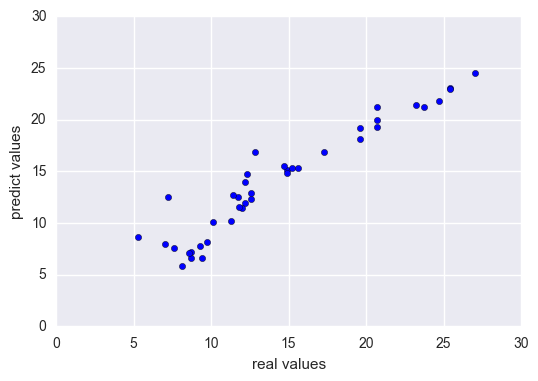

In [14]:
# Code here
plt.scatter(y_test,y_test_pred)
plt.xlabel("real values")
plt.ylabel("predict values")

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [50]:
# Code/explanation here

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

In [ ]:
# Type your answer here. 

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


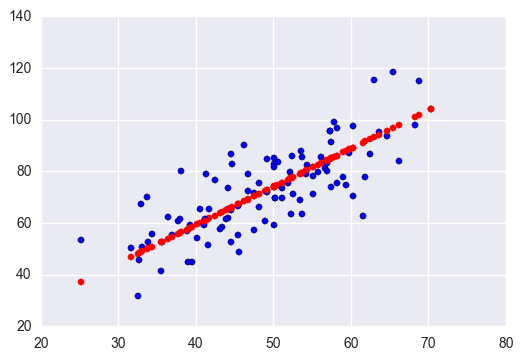

In [54]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

In [48]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

# Problem 4

Take the model that you trained in Problem 2 (before any improvements), and let's try to determine
the confdience we have in the coefficient estimates, and also try to optimize for the number of coefficients.

### Probelm 4.1. Lasso Regression

a) Use $L^1$ regularization on the scaled dataset (but original, with no new features), to the paramter
which yields the best $R^2$. Plot your result.

**Hint:** Take as your range of alpha:
`alphas = np.logspace(-3,0.5,30)`


b) Using the optimal constant, plot the feature coefficients - which one seems the least significant?


c) Now repeat the above, but take an average off 5 folds using cross validation. Do a boxplot of the coefficients
and their range of values.

In [6]:
from sklearn.linear_model import Lasso
from sklearn import preprocessing

In [30]:
X = preprocessing.scale(X)


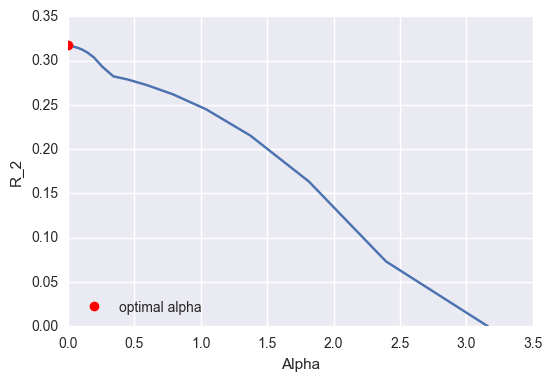

In [31]:
#part(a)
alphas = np.logspace(-3,0.5,30)
r_square = []
for a in alphas:
    regr = Lasso(alpha = a)
    regr.fit(X,y)
    r_2 = regr.score(X,y)
    r_square.append(r_2)
plt.plot(alphas, r_square)
loc_max = r_square.index(max(r_square))
plt.plot(alphas[loc_max],r_square[loc_max],'ro',label='optimal alpha')
plt.xlabel("Alpha")
plt.ylabel("R_2")
plt.legend(loc='lower left')
plt.show()
    

[ 4.28457524  1.6073856   0.34521014]


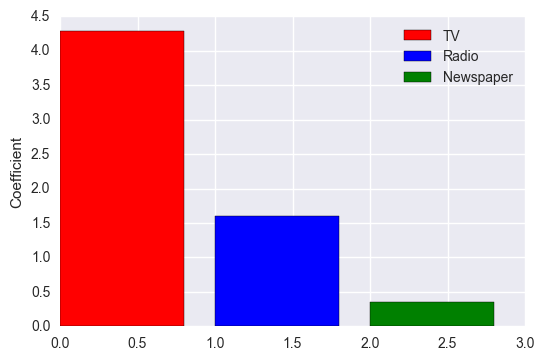

In [32]:
#part(b)
regr = Lasso(alpha = 0.001)
regr.fit(X,y)
coef = regr.coef_
print coef
plt.bar(0,coef[0],color='r',label='TV')
plt.bar(1,coef[1],color='b',label='Radio')
plt.bar(2,coef[2],color='g',label='Newspaper')
plt.legend()
plt.ylabel("Coefficient")
plt.show()


The result when alpha=0.001 suggests that Newspaper is least significant.

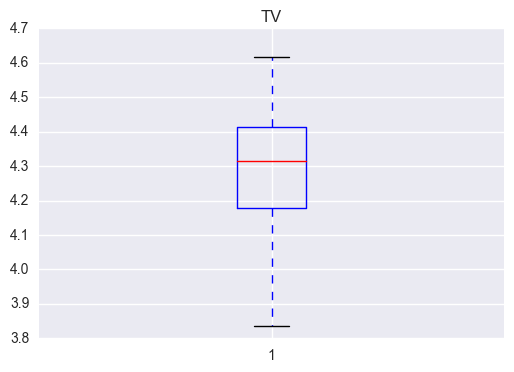

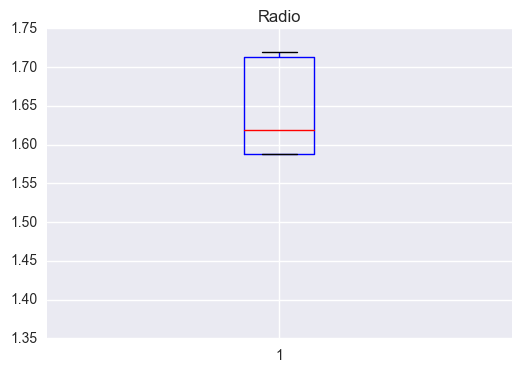

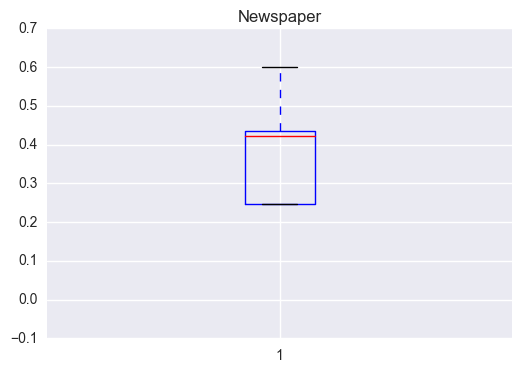

In [33]:
#part(c)
Index = range(int(len(df)))
random.shuffle(Index)
size = int(len(df)*0.2)
Coef_TV = []
Coef_Radio = []
Coef_News = []
for i in range(5):
    X_train = []
    y_train = []
    for j in range(size*i):
        X_train.append(X[Index[j]])
        y_train.append(y.iloc[Index[j]])
    for k in range(size*(i+1),int(len(df))):
        X_train.append(X[Index[k]])
        y_train.append(y.iloc[Index[k]])
    regr = Lasso(alpha = 0.001)
    regr.fit(X_train,y_train)
    coef = regr.coef_
    Coef_TV.append(coef[0])
    Coef_Radio.append(coef[1])
    Coef_News.append(coef[2])
plt.boxplot(Coef_TV)
plt.title("TV")
plt.show()
plt.boxplot(Coef_Radio)
plt.title("Radio")
plt.show()
plt.boxplot(Coef_News)
plt.title("Newspaper")
plt.show()


### Probelm 4.2. Ridge Regression. 

Repeat the above problem but with $L^2$. This time you will have to find the right range of alphas yourself.

0.0172413793103


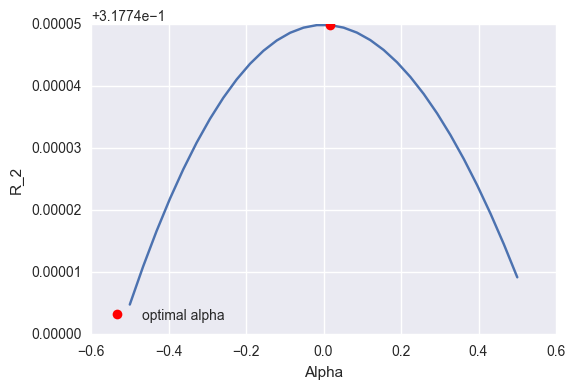

In [34]:
from sklearn.linear_model import Ridge
#part(a)
alphas = np.linspace(-0.5,0.5,30)
r_square = []
for a in alphas:
    regr = Ridge(alpha = a)
    regr.fit(X,y)
    r_2 = regr.score(X,y)
    r_square.append(r_2)
plt.plot(alphas, r_square)
loc_max = r_square.index(max(r_square))
plt.plot(alphas[loc_max],r_square[loc_max],'ro',label='optimal alpha')
plt.xlabel("Alpha")
plt.ylabel("R_2")
plt.legend(loc='lower left')
print alphas[loc_max]
plt.show()

[ 4.29497546  1.6137402   0.35155152]


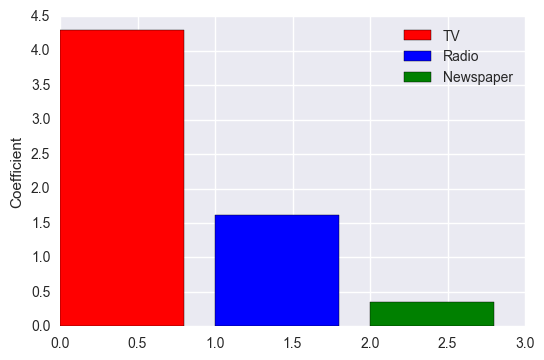

In [35]:
#part(b) choosing alpha = 0
regr = Ridge(alpha = 0.017)
regr.fit(X,y)
coef = regr.coef_
print coef
plt.bar(0,coef[0],color='r',label='TV')
plt.bar(1,coef[1],color='b',label='Radio')
plt.bar(2,coef[2],color='g',label='Newspaper')
plt.legend()
plt.ylabel("Coefficient")
plt.show()

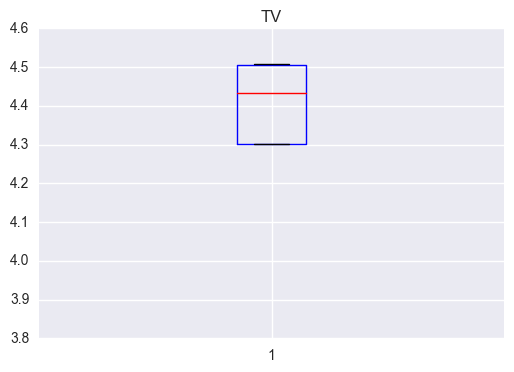

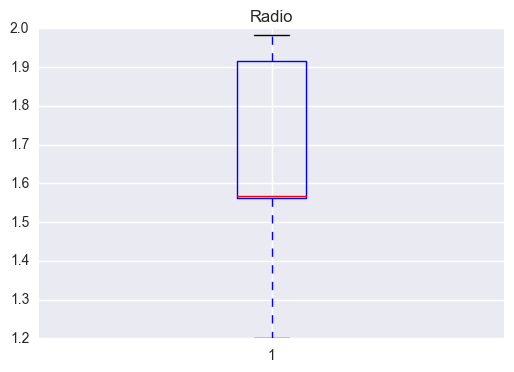

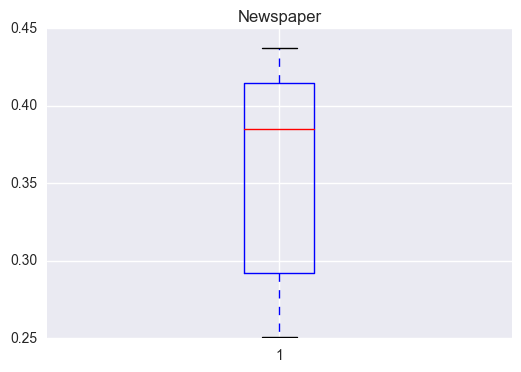

In [36]:
#part(c)
Index = range(int(len(df)))
random.shuffle(Index)
size = int(len(df)*0.2)
Coef_TV = []
Coef_Radio = []
Coef_News = []
for i in range(5):
    X_train = []
    y_train = []
    for j in range(size*i):
        X_train.append(X[Index[j]])
        y_train.append(y.iloc[Index[j]])
    for k in range(size*(i+1),int(len(df))):
        X_train.append(X[Index[k]])
        y_train.append(y.iloc[Index[k]])
    regr = Ridge(alpha = -0.03344)
    regr.fit(X_train,y_train)
    coef = regr.coef_
    Coef_TV.append(coef[0])
    Coef_Radio.append(coef[1])
    Coef_News.append(coef[2])
plt.boxplot(Coef_TV)
plt.title("TV")
plt.show()
plt.boxplot(Coef_Radio)
plt.title("Radio")
plt.show()
plt.boxplot(Coef_News)
plt.title("Newspaper")
plt.show()

### Problem 4.3. P values

Compute the $p$ values of the ordinary least squares problem, and make a box plot
of the coefficients and their 95% cut off mark. How do the ranges compare to those of the boxplots
which ranged over the 5 folds?

In [42]:
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [43]:
re = sm.OLS(y, X).fit()

print re.summary()    #print the result type Stata
#The p-values are listed next to the t-stats (as P>|t|)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.628
Date:                Fri, 17 Feb 2017   Prob (F-statistic):             0.0515
Time:                        08:51:37   Log-Likelihood:                -820.90
No. Observations:                 200   AIC:                             1648.
Df Residuals:                     197   BIC:                             1658.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.2979      2.623      1.638      0.1

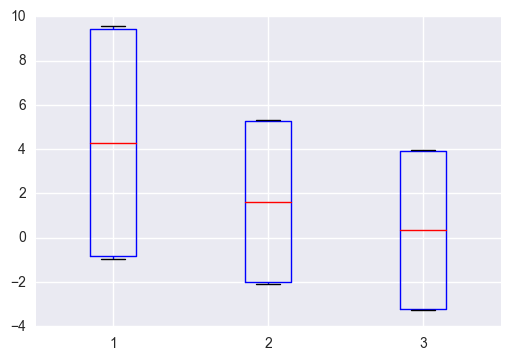

In [72]:
x1 = re.params[0]
x2 = re.params[1]
x3 = re.params[2]
sd1 = re.bse[0]
sd2 = re.bse[1]
sd3 = re.bse[2]
X1 = [x1-2*sd1,x1-1.96*sd1,x1,x1+1.96*sd1,x1+2*sd1]
X2 = [x2-2*sd2,x2-1.96*sd2,x2,x2+1.96*sd2,x2+2*sd2]
X3 = [x3-2*sd3,x3-1.96*sd3,x3,x3+1.96*sd3,x3+2*sd3]
plt.boxplot([X1,X2,X3])

plt.show()

The plot above shows the range of coefficient for TV, Radio, Newspaper respectively, with the upper and lower bound for the 99% confidence interval and the center box for the 95% confidence interval.

The red line is the coefficient estimate produced by the OLS problem.

The single fold confidence interval is much larger compared with the 5-fold range of coefficient values because there is a large probability that the estimate is going to fall inside the center region of the respective boxes. 